In [7]:
import torch
import torch.nn as nn
import math

class se_block(nn.Module):
    def __init__(self, channel, ratio=16):
        super(se_block, self).__init__()
        self.avg_pool = nn.AdaptiveAvgPool2d(1)
        self.fc = nn.Sequential(
                nn.Linear(channel, channel // ratio, bias=False),
                nn.ReLU(inplace=True),
                nn.Linear(channel // ratio, channel, bias=False),
                nn.Sigmoid()
        )

    def forward(self, x):
        b, c, _, _ = x.size()
        #b,c,_,_ ->b,c,1,1->b,c-> b,c/ratio -> b,c ->b,c,1,1
        y = self.avg_pool(x).view(b, c)
        y = self.fc(y).view(b, c, 1, 1)
        return x * y

model = se_block(channel=30)
print(model)
input = torch.ones(2,30,30,200)
output = model(input)


se_block(
  (avg_pool): AdaptiveAvgPool2d(output_size=1)
  (fc): Sequential(
    (0): Linear(in_features=30, out_features=1, bias=False)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=1, out_features=30, bias=False)
    (3): Sigmoid()
  )
)


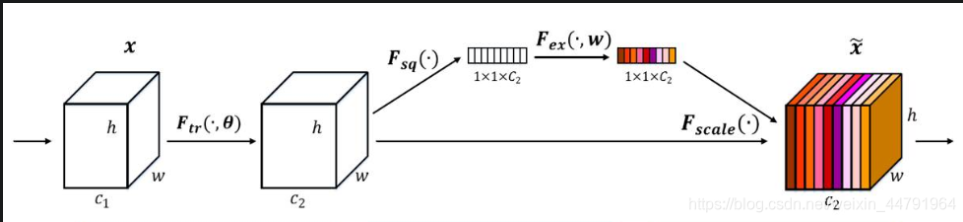